# FASTAI intro

In [1]:
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [2]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [3]:
df = pd.DataFrame({'label':dataset.target,
                   'text':dataset.data})


In [4]:
df = df[df['label'].isin([1,10])]
df = df.reset_index(drop = True)
# label 10 is about sports
# label 1 is about graphics
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

In [5]:
df.head()

,label,text
0,10,"Well, I will have to change the scoring on my ..."
1,1,Archive-name: graphics/resources-list/part1\nL...
2,10,"\nAnd of course, Mike Ramsey was (at one time)..."
3,10,"As I promised, I would give you the name of th..."
4,10,GAME(S) OF 4/15\n---------------\nADIRONDACK 6...


# Enter FAST.AI

In [6]:
# use either ?+func or help(func)in jupyter notebook, or the docs to find out what these do
data_lm = (TextList.from_df(df, cols='text')
                .split_by_rand_pct()
                .label_for_lm()
                #.label_from_df(cols='label')
                .databunch(bs=32))

In [7]:
data_lm.x[:1]

LMTextList (1 items)
xxbos xxmaj well , i will have to change the scoring on my playoff pool . xxmaj unfortunately 
  i do n't have time right now , but i will certainly post the new scoring 
  rules by tomorrow . xxmaj does it matter ? xxmaj no , you 'll enter anyway ! ! ! xxmaj good ! 
 
  -- 
  xxmaj keith xxmaj keller 				 xxup let xxup 's xxup go xxup rangers xxrep 5 ! 
 						 xxup let xxup 's xxup go xxup quakers xxrep 5 ! 
 	 kkeller@mail.sas.upenn.edu 		 xxup ivy xxup league xxup champs xxrep 4 !
Path: .

In [8]:
data_lm.y

LMLabelList (948 items)
,,,,
Path: .

In [9]:
data_lm.show_batch()

idx,text
0,"xxup go xxup rangers xxrep 5 ! \n \t\t\t\t\t\t xxup let xxup 's xxup go xxup quakers xxrep 5 ! \n \t kkeller@mail.sas.upenn.edu \t\t xxup ivy xxup league xxup champs xxrep 4 ! xxbos \n xxmaj and of course , xxmaj mike xxmaj ramsey was ( at one time ) the captain in xxmaj buffalo prior to \n being traded to xxmaj pittsburgh . xxmaj currently , the"
1,slow and xxunk . xxmaj sel{nne has also said that in the xxmaj finnish xxmaj sm - league \n game is more based on skill than in xxup nhl . xxmaj in xxmaj finland he could n't get so many \n xxunk because defenders here are an average much better skaters than in \n xxup nhl . xxmaj also xxmaj xxunk xxmaj xxunk said that in xxup
2,"chosen . xxmaj different xxunk for the same level , xxunk a bit , but \n the levels xxunk their order . \n \n xxmaj readers should xxunk what i wrote ... :-) xxbos \n [ ... stuff deleted ... ] \n \n i have to agree here . xxmaj as i heard on xxup tsn tonight , "" xxmaj you want to pick \n"
3,"a way to create high quality postscript printouts ? xxmaj what is the \n xxunk component , the postscript language or the postscript xxunk on \n the printer ? \n \n xxmaj the xxmaj big question : \n \n xxmaj where can i get some software to drive the xxup scsi port for this printer ? \n \n \n \n xxmaj please email directly to"
4,\t xxunk \n 71.7 \t 64.5 \t 70 \t xxup nj \t xxunk \n 71.7 \t 64.5 \t 70 \t xxup wpg \t xxunk \n 71.7 \t 64.5 \t 70 \t xxup wpg \t xxunk \n 71.7 \t 64.5 \t 70 \t xxup chi \t xxunk \n 69.8 \t xxunk \t 69 \t xxup pit \t xxunk \n xxunk \t xxunk \t 67 \t


In [10]:
data_lm.vocab.stoi

defaultdict(int,
            {'xxunk': 0,
             'xxpad': 1,
             'xxbos': 2,
             'xxeos': 3,
             'xxfld': 4,
             'xxmaj': 5,
             'xxup': 6,
             'xxrep': 7,
             'xxwrep': 8,
             '\n ': 9,
             ',': 10,
             '.': 11,
             'the': 12,
             '-': 13,
             '\t': 14,
             '\n \n ': 15,
             ')': 16,
             '(': 17,
             'to': 18,
             'a': 19,
             'and': 20,
             'of': 21,
             'i': 22,
             'in': 23,
             ':': 24,
             '1': 25,
             'is': 26,
             'for': 27,
             'it': 28,
             'that': 29,
             '0': 30,
             'on': 31,
             '2': 32,
             '/': 33,
             'you': 34,
             '"': 35,
             '4': 36,
             "'s": 37,
             '!': 38,
             'be': 39,
             'have': 40,
             'this': 41,


# Model

In [12]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


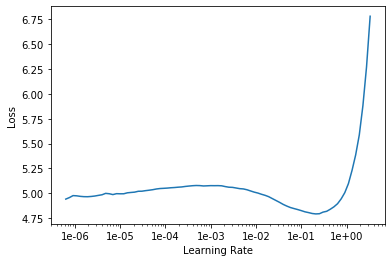

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.288223,3.764013,0.283304,00:57
1,3.586281,3.555422,0.304074,01:01
2,3.099239,3.456249,0.320915,01:01
3,2.831385,3.447188,0.323739,01:02


In [52]:
TEXT = "The coach said"
N_WORDS = 40
N_SENTENCES = 2

# you can change temperature to see what happens
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

The coach said that Techniques School would be a middle school for people who would n't be able to direct to the above system and would be able to learn harder their self - use . The CBC reported
The coach said that the team would like to 
  go to the World Championships . The NHL 's teams would send their requests to players from the NHL . It would be the team that


In [53]:
learn.save('pretrained')

In [54]:
learn.unfreeze(); 
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.716115,3.277621,0.350684,00:15
1,2.567410,3.256793,0.363363,00:15
2,2.226464,3.272996,0.363601,00:15
3,1.866192,3.336351,0.367113,00:15
4,1.619569,3.387283,0.364048,00:15


In [55]:
learn.save('fine_tuned')

In [56]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.571302,3.438952,0.359821,00:15
1,1.685357,3.477120,0.356592,00:15
2,1.403097,3.597580,0.352872,00:15
3,1.111390,3.698282,0.351994,00:15
4,0.932862,3.753394,0.351116,00:15


In [59]:
learn.load('fine_tuned');

In [60]:
TEXT = "The coach said"
N_WORDS = 40
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

The coach said it will be a LA Kings game for the next two 
  years . The team might have a coach and a coach . 
  The coach will be Coach , and once the coach
The coach said the Leafs ' captain is Bill Wirtz , and is 
  responsible for the Leafs ' 
  victory . When they were traded to Chicago , they were called " The Leafs


In [61]:
learn.save_encoder('fine_tuned_enc')

# Your turn

In [79]:
data_classification = (TextList._______(__, ____='text', ____=data_lm.vocab)
                .split_by_rand_pct()
                ._____________(cols='label')
                ._________(bs=__))

you had a data_lm databunch, you know have a data_classification databunch; make sure they share the same vocab

In [80]:
print(len(data_lm.____.itos))
print(len(data_classification._____.____))


6080

In [86]:
data_classification.show_batch(10)

text,target
xxbos xxmaj archive - name : hockey - faq \n \n rec.sport.hockey answers to xxmaj frequently xxmaj asked xxmaj questions and other news : \n \n xxmaj contents : \n \n 0 . xxmaj new xxmaj info . \n 1 . xxup nhl \n 2 . xxup nhl xxmaj minor xxmaj leagues \n 3 . xxmaj college xxmaj hockey ( xxmaj north xxmaj america,10
xxbos xxmaj archive - name : graphics / resources - list / xxunk \n xxmaj last - modified : 1993 / 04 / 17 \n \n \n xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly xxup posting [ xxup part 1 / 3 ] \n xxrep 51 = \n xxmaj last xxmaj change : 17 xxmaj april 1993 \n \n xxmaj many,1
xxbos xxmaj archive - name : graphics / resources - list / xxunk \n xxmaj last - modified : 1993 / 04 / 17 \n \n \n xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly xxup posting [ xxup part 3 / 3 ] \n xxrep 51 = \n xxmaj last xxmaj change : 17 xxmaj april 1993 \n \n \n 11,1
xxbos xxmaj archive - name : jpeg - faq \n xxmaj last - modified : 18 xxmaj april 1993 \n \n xxmaj this xxup faq article xxunk xxup jpeg image compression . xxmaj suggestions for \n additions and xxunk are welcome . \n \n xxmaj new since version of 3 xxmaj april 1993 : \n * xxmaj new versions of xxmaj image xxmaj xxunk and,1
xxbos xxmaj archive - name : graphics / resources - list / xxunk \n xxmaj last - modified : 1993 / 04 / 17 \n \n \n xxmaj computer xxmaj graphics xxmaj resource xxmaj listing : xxup weekly xxup posting [ xxup part 2 / 3 ] \n xxrep 51 = \n xxmaj last xxmaj change : 17 xxmaj april 1993 \n \n \n 14,1
"xxbos xxmaj here are the standings after the xxmaj april 6 update . i 'll be leaving for xxmaj japan \n in 1.5 hours , and i wo n't be back until xxmaj april 17 . xxmaj xxunk , i will not \n post the week 27 results until xxmaj april 18 . xxmaj email sent between xxmaj april 13 and \n xxmaj april 18 will be",10
"xxbos xxmaj well , i 'm back from xxmaj xxunk , so here are the standings after the xxmaj april 13 update . \n \n \t - xxmaj andrew \n \n xxup usenet xxmaj hockey xxmaj draft xxmaj standings \n xxmaj week 27 \n \n xxmaj posn \t xxmaj team \t\t\t\t xxmaj pts \t xxmaj xxunk \t xxmaj xxunk \t xxmaj last xxmaj posn \n \n",10
"xxbos xxmaj here are the final stats for the xxup chl for the 1992 - 1993 season . \n \n xxmaj central xxmaj hockey xxmaj league \n \n xxunk xxup s. xxmaj memorial xxmaj drive \n xxmaj suite 205 \n xxmaj tulsa , xxup ok xxunk \n xxmaj phone : ( 918 ) xxunk - xxunk \n xxmaj fax : ( 918 ) xxunk",10
"xxbos xxmaj tampa xxmaj bay 1 1 0 - -2 \n xxmaj philadelphia 3 2 1 - -6 \n xxmaj first period \n 1 , xxmaj philadelphia , xxmaj carkner 3 ( unassisted ) 1:24 . \n 2 , xxmaj philadelphia , xxmaj hawgood 9 ( xxmaj recchi , xxmaj lindros ) pp , xxunk . \n 3 , xxmaj philadelphia , xxmaj lindros 37",10
"xxbos 1992 - 93 xxmaj los xxmaj angeles xxmaj kings xxmaj schedule / xxmaj results \n \n xxup tv : \n --- \n 2 preseason games , 82 of 84 regular season and all playoffs on xxup tv . \n \n ( xxup xxunk xxmaj prime xxmaj ticket , ( 5 ) = xxup xxunk xxmaj channel 5 , ( 7 ) = xxup abc xxmaj",10


In [83]:
# careful: you don't want a langage model learner, here you are doing classification ! 
learn = 

# since we have a similar learner (model), we can load the weights we learned above
learn.load_encoder('fine_tuned_enc');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


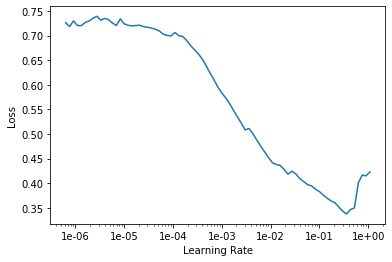

In [87]:
# find a good learning rate
learn._______();
learn.________.plot()

In [88]:
# fit the model
learn._____________(_____, lr=____, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.266938,0.169815,0.940678,00:19


In [89]:
# make a prediction about a sentence; will "the coach" be about sports (10), or graphics (1) ?
learn._______('the coach')

(Category 10, tensor(1), tensor([0.1096, 0.8904]))

In [97]:
_____._______('it renders a beautiful twzfnkz')

(Category 1, tensor(0), tensor([0.9301, 0.0699]))

In [ ]:
# make your own predictions